In [1]:
import sys
sys.path.insert(0, '../models')

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.decomposition import PCA

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
from UFCNN1 import draw_model, print_nodes_shapes, save_neuralnet, ufcnn_model_concat, ufcnn_model_sum, ufcnn_model, \
prepare_tradcom_classification, train_and_predict_classification, get_tradcom_normalization

Using TensorFlow backend.


In [7]:
from UFCNN1 import standardize_inputs, ufcnn_model_seq, print_layers_shapes

In [8]:
from keras.optimizers import SGD

In [9]:
sgd = SGD(lr=0.0005, decay=1e-6, momentum=0.9, nesterov=True)

In [10]:
model_concat = ufcnn_model_concat(regression = False, output_dim=3, features=32, 
       loss="categorical_crossentropy", sequence_length=500, optimizer=sgd )

In [11]:
print_nodes_shapes(model_concat)

input : <class 'keras.layers.core.Layer'> : (None, 500, 32) : (None, 500, 32)
input_padding : <class 'keras.layers.convolutional.ZeroPadding1D'> : (None, 500, 32) : (None, 504, 32)
conv1 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 504, 32) : (None, 500, 150)
relu1 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv2 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu2 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv3 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu3 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv4 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu4 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 1

In [9]:
model_concat = ufcnn_model_concat(regression = False, output_dim=3, features=32, 
       loss="categorical_crossentropy", sequence_length=500, optimizer=sgd )

In [13]:
print_nodes_shapes(model_concat)

input : <class 'keras.layers.core.Layer'> : (None, 500, 32) : (None, 500, 32)
conv1 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 32) : (None, 500, 150)
relu1 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv2 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu2 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv3 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu3 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv4 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu4 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv5 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 300) : (None, 500, 150)
re

In [11]:
model_concat_regression = ufcnn_model_concat(regression = True, output_dim=1, features=32, 
       loss="mse", sequence_length=500, optimizer=sgd )

In [12]:
print_nodes_shapes(model_concat_regression)

input : <class 'keras.layers.core.Layer'> : (None, 500, 32) : (None, 500, 32)
conv1 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 32) : (None, 500, 150)
relu1 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv2 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu2 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv3 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu3 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv4 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu4 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv5 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 300) : (None, 500, 150)
re

In [9]:
model_concat = ufcnn_model(regression = False, output_dim=3, features=32, 
       loss="categorical_crossentropy", sequence_length=500, optimizer=sgd, mode='concat' )

In [10]:
print_nodes_shapes(model_concat)

input : <class 'keras.layers.core.Layer'> : (None, 500, 32) : (None, 500, 32)
conv1 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 32) : (None, 500, 150)
relu1 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv2 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu2 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv3 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu3 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv4 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu4 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv5 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 300) : (None, 500, 150)
re

In [10]:
draw_model(model_concat)

In [ ]:
model_sum = ufcnn_model_sum(regression = False, output_dim=3, features=32, 
       loss="categorical_crossentropy", sequence_length=500, optimizer=sgd, mode='sum' )

In [14]:
model_sum = ufcnn_model(regression = False, output_dim=3, features=32, 
       loss="categorical_crossentropy", sequence_length=500, optimizer=sgd, mode='sum' )

In [15]:
print_nodes_shapes(model_sum)

input : <class 'keras.layers.core.Layer'> : (None, 500, 32) : (None, 500, 32)
conv1 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 32) : (None, 500, 150)
relu1 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv2 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu2 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv3 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu3 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv4 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu4 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv5 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
re

In [18]:
print_nodes_shapes(model_sum)

input : <class 'keras.layers.core.Layer'> : (None, 500, 32) : (None, 500, 32)
conv1 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 32) : (None, 500, 150)
relu1 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv2 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu2 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv3 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu3 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv4 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
relu4 : <class 'keras.layers.advanced_activations.ParametricSoftplus'> : (None, 500, 150) : (None, 500, 150)
conv5 : <class 'keras.layers.convolutional.Convolution1D'> : (None, 500, 150) : (None, 500, 150)
re

In [30]:
Xdf = pd.read_csv('../models/training_data_large/prod_data_20130729v.txt', sep=" ", index_col = 0, header = None,)

In [12]:
ydf = pd.read_csv('../models/training_data_large/signal_20130729v.csv', index_col = 0, names = ['signal',], )

In [13]:
ydf

,signal
43264234,-1
43264739,-1
43265282,-1
43265789,-1
43266318,-1
43266846,-1
43267353,0
43267872,0
43268387,0
43268898,0


In [14]:
Xdf.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
count,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000,...,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000
mean,4528.503695,4527.986467,292.032126,4529.025566,314.730943,-0.006248,0.061189,0.063878,-0.056281,-0.056014,...,-68.085227,-0.048457,0.040879,-0.005342,-0.175384,-0.074360,-0.004406,0.205098,-0.074945,0.002297
std,7.091962,7.096300,402.466606,7.092489,268.652928,0.969723,0.501643,0.979621,0.612950,0.994605,...,346.127357,16.470564,0.709954,0.327163,1.599705,0.747817,0.231498,1.720832,2.004901,0.189858
min,4513.442966,4513.000000,10.000000,4514.000000,10.000000,-5.300362,-3.142692,-5.165990,-3.458124,-7.612156,...,-2170.000000,-68.912082,-2.860846,-3.105852,-6.433072,-5.428968,-0.827306,-4.982010,-15.306670,-1.272888
25%,4523.483634,4523.000000,130.000000,4524.000000,120.000000,-0.503704,-0.134776,-0.398840,-0.296592,-0.583548,...,-228.888888,-10.634058,-0.433480,-0.113374,-1.130916,-0.356486,-0.167236,-1.100764,-0.944650,0.000000
50%,4528.321634,4528.000000,220.000000,4529.000000,240.000000,0.022336,0.000000,0.030460,-0.027716,-0.048040,...,-76.666666,0.521168,0.048912,0.000000,-0.217928,-0.014408,0.000384,0.163566,-0.000000,0.000000
75%,4533.542640,4533.000000,360.000000,4534.000000,450.000000,0.520892,0.233978,0.458288,0.194748,0.461766,...,97.777778,11.078318,0.507192,0.109450,0.750900,0.278332,0.166794,1.533210,0.832284,0.000000
max,4544.511066,4544.000000,7430.000000,4545.000000,2570.000000,5.462836,3.951678,6.683222,3.634796,5.598256,...,4170.000000,74.140150,4.666812,3.842634,6.560304,3.466916,0.787244,7.748302,10.165278,1.104922


In [11]:
indicators = Xdf[range(6,33)]

In [15]:
indicators = indicators.sub(indicators.mean())

In [16]:
indicators = indicators.div(indicators.std())

In [17]:
indicators.describe()

,6,7,8,9,10,11,12,13,14,15,...,23,24,25,26,27,28,29,30,31,32
count,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,...,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04
mean,1.779253e-16,-5.794826e-15,1.576823e-16,-1.959310e-15,-2.929908e-16,-6.605612e-17,-6.967003e-14,6.179443e-16,1.230348e-14,-2.336469e-15,...,4.219068e-15,3.036451e-17,1.497982e-15,-7.750939e-17,8.523370e-17,-6.285985e-17,2.706170e-16,4.421498e-15,1.688693e-16,1.054767e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.459411e+00,-6.386769e+00,-5.338667e+00,-5.549951e+00,-7.597130e+00,-3.461954e+00,-3.017210e+00,-3.889494e+00,-3.361662e+00,-4.148984e+00,...,-6.072663e+00,-4.181012e+00,-4.087199e+00,-9.476943e+00,-3.911775e+00,-7.160319e+00,-3.554669e+00,-3.014303e+00,-7.597245e+00,-6.716526e+00
25%,-5.129881e-01,-3.906464e-01,-4.723444e-01,-3.920565e-01,-5.303954e-01,-7.493184e-01,-6.829345e-01,-7.005503e-01,-7.471192e-01,-7.821417e-01,...,-4.645795e-01,-6.426981e-01,-6.681542e-01,-3.302073e-01,-5.973172e-01,-3.772660e-01,-7.033728e-01,-7.588551e-01,-4.337893e-01,-1.210090e-02
50%,2.947630e-02,-1.219775e-01,-3.411349e-02,4.660233e-02,8.017472e-03,-4.055363e-02,2.152361e-02,7.690110e-02,1.424535e-02,-1.083107e-01,...,-2.479272e-02,3.458445e-02,1.131478e-02,1.632894e-02,-2.659460e-02,8.016953e-02,2.069328e-02,-2.413491e-02,3.738106e-02,-1.210090e-02
75%,5.435986e-01,3.444454e-01,4.026148e-01,4.095421e-01,5.205889e-01,7.709655e-01,4.731585e-01,7.280373e-01,6.986443e-01,7.757446e-01,...,4.791965e-01,6.755552e-01,6.568210e-01,3.508712e-01,5.790344e-01,4.716290e-01,7.395326e-01,7.717848e-01,4.525058e-01,-1.210090e-02
max,5.639844e+00,7.755486e+00,6.757049e+00,6.021822e+00,5.684942e+00,3.056568e+00,3.994932e+00,3.284439e+00,3.866930e+00,3.173313e+00,...,1.224429e+01,4.504315e+00,6.515817e+00,1.176163e+01,4.210581e+00,4.735485e+00,3.419683e+00,4.383464e+00,5.107595e+00,5.807631e+00


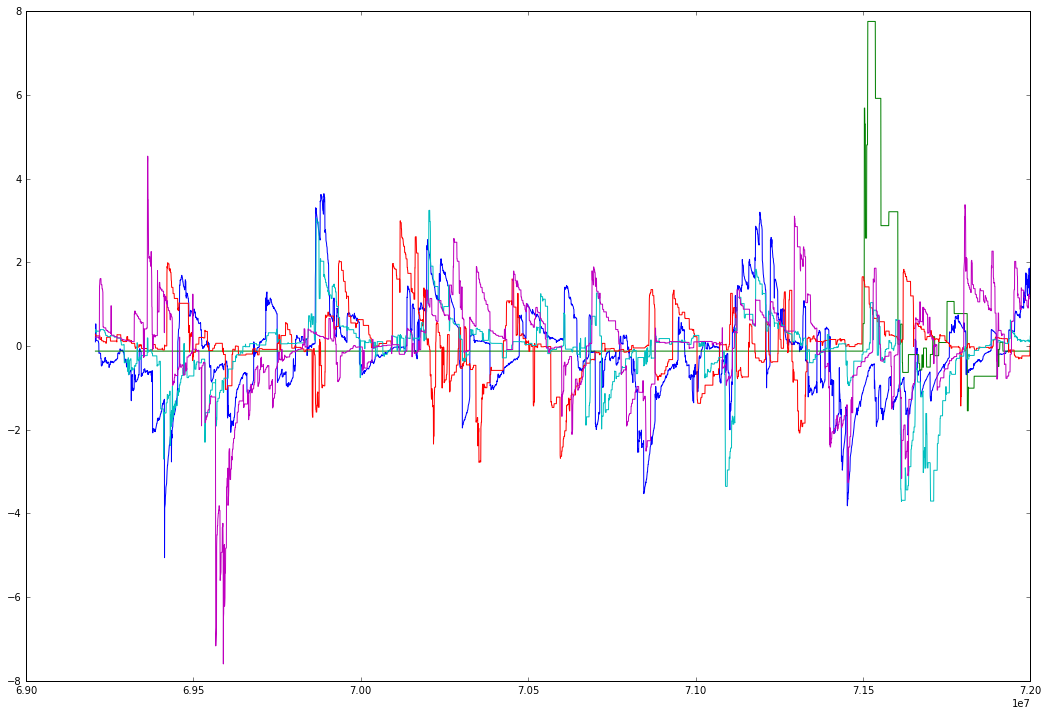

In [53]:
plt.figure(figsize=(18,12))
plt.plot(indicators[-5000:][[6, 7, 8, 9, 10]])

In [40]:
pca = PCA(n_components=15)
pca.fit(indicators.values)

PCA(copy=True, n_components=15, whiten=False)

In [41]:
pca.explained_variance_ratio_

array([ 0.20578496,  0.13508374,  0.09762137,  0.07507347,  0.06276689,
        0.05787578,  0.04907913,  0.04143535,  0.03605835,  0.0351595 ,
        0.03143687,  0.02887315,  0.02437674,  0.02275628,  0.01857632])

In [33]:
pca.explained_variance_

array([ 5.55608985,  3.64719274,  2.63572761,  2.02694562,  1.69467438])

In [42]:
np.sum(pca.explained_variance_ratio_)

0.9219579116377834

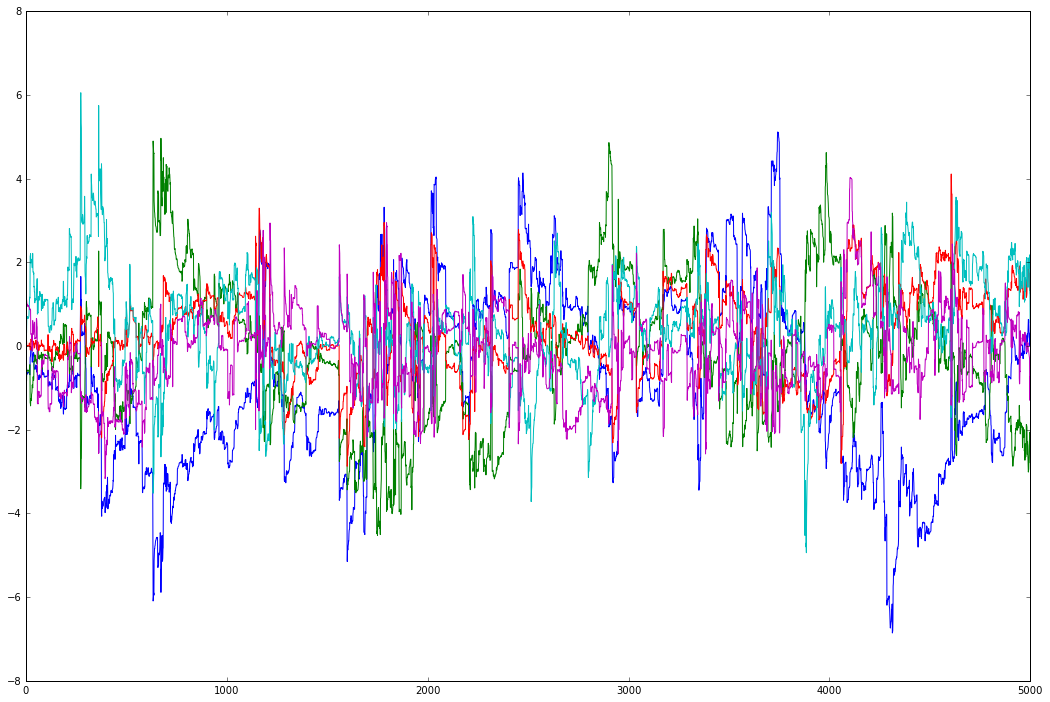

In [52]:
plt.figure(figsize=(18,12))
plt.plot(pca_ind[-5000:, 0:5])

In [44]:
pca.components_.shape

(15, 27)

In [45]:
pca_ind = pca.transform(indicators.values)

In [79]:
pca_ind_df = pd.DataFrame(data=pca_ind, index=indicators.index)

In [78]:
Xdf.shape

(53353, 32)

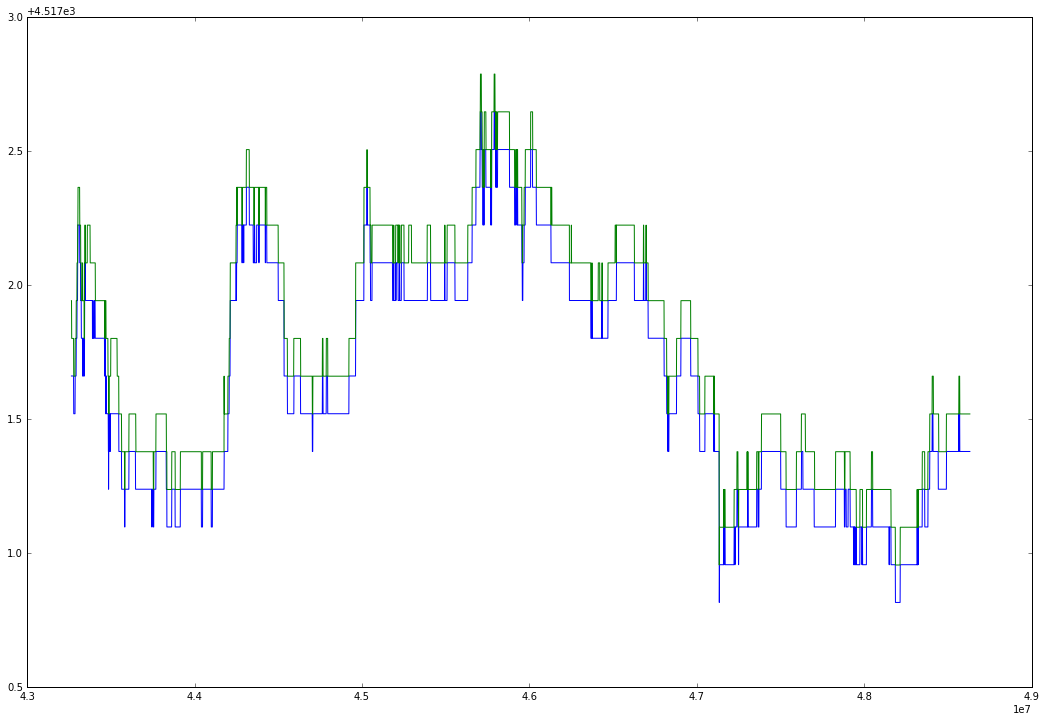

In [121]:
plt.figure(figsize=(18,12))
#plt.plot(Xdf[0:10000][[2, 4]])
#plt.plot(ydf.add(4516)[0:10000])
plt.plot(ba_df_std.add(4520)[0:10000][[2, 4]])
#plt.plot(Xdf_std.add(4520)[0:10000][[2, 4]])
#plt.plot(Xdf.div(Xdf.std()).add(4510)[0:10000][[3, 5]])
#plt.plot(pca_ind_df.add(4505)[0:10000][[0,]])
#plt.plot(indicators.add(4505)[0:10000][[6,]])

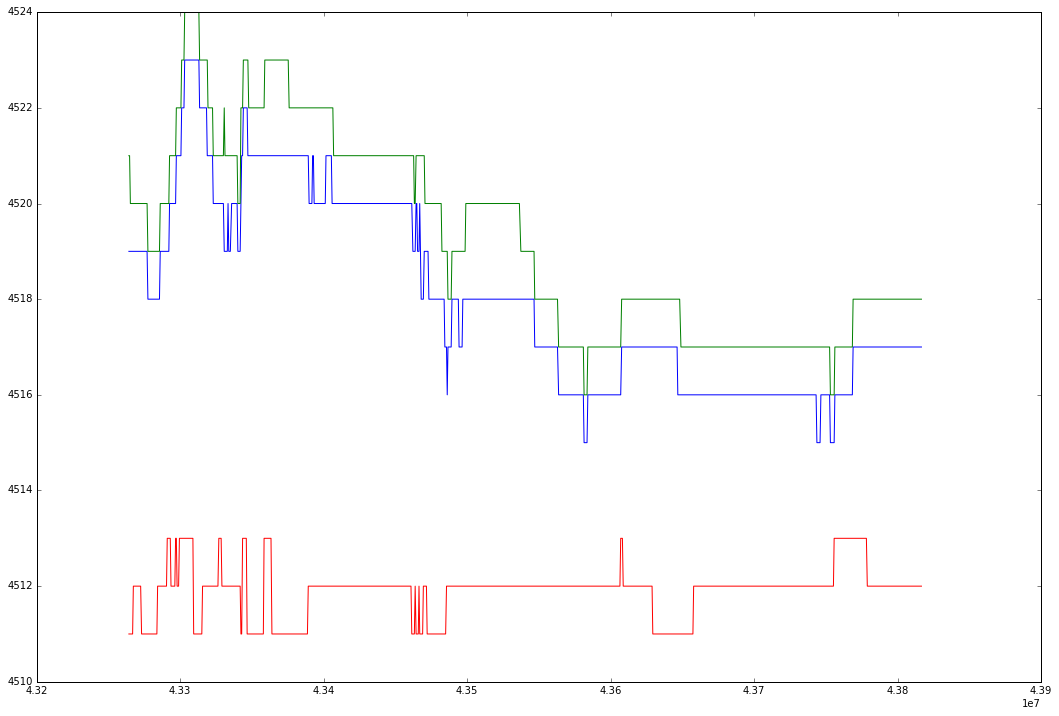

In [110]:
plt.figure(figsize=(18,12))
plt.plot(Xdf[0:1000][[2, 4]])
plt.plot(ydf.add(4512)[0:1000])

In [97]:
    Xdf_std = Xdf.sub(Xdf.mean())

    Xdf_std = Xdf_std.div(Xdf_std.std())

In [107]:
    ba_df_std = Xdf[[2, 4]].sub(Xdf[[2, 4]].mean(axis=1).mean())

    ba_df_std = ba_df_std.div(ba_df_std.std())

In [108]:
ba_df_std.describe()

,2,4
count,53353.000000,53353.000000
mean,-0.073214,0.073253
std,1.000000,1.000000
min,-2.185085,-2.045265
25%,-0.775900,-0.635322
50%,-0.071307,0.069649
75%,0.633285,0.774620
max,2.183389,2.325556


In [99]:
Xdf_std.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
count,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,...,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04
mean,-1.859223e-11,3.492877e-14,-2.397198e-17,-2.471777e-15,8.629912e-17,1.779253e-16,-5.794826e-15,1.576823e-16,-1.959310e-15,-2.929908e-16,...,4.219068e-15,3.036451e-17,1.497982e-15,-7.750939e-17,8.523370e-17,-6.285985e-17,2.706170e-16,4.421498e-15,1.688693e-16,1.054767e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.123634e+00,-2.111871e+00,-7.007591e-01,-2.118518e+00,-1.134292e+00,-5.459411e+00,-6.386769e+00,-5.338667e+00,-5.549951e+00,-7.597130e+00,...,-6.072663e+00,-4.181012e+00,-4.087199e+00,-9.476943e+00,-3.911775e+00,-7.160319e+00,-3.554669e+00,-3.014303e+00,-7.597245e+00,-6.716526e+00
25%,-7.078522e-01,-7.026855e-01,-4.025977e-01,-7.085757e-01,-7.248421e-01,-5.129881e-01,-3.906464e-01,-4.723444e-01,-3.920565e-01,-5.303954e-01,...,-4.645795e-01,-6.426981e-01,-6.681542e-01,-3.302073e-01,-5.973172e-01,-3.772660e-01,-7.033728e-01,-7.588551e-01,-4.337893e-01,-1.210090e-02
50%,-2.567144e-02,1.906981e-03,-1.789767e-01,-3.604598e-03,-2.781691e-01,2.947630e-02,-1.219775e-01,-3.411349e-02,4.660233e-02,8.017472e-03,...,-2.479272e-02,3.458445e-02,1.131478e-02,1.632894e-02,-2.659460e-02,8.016953e-02,2.069328e-02,-2.413491e-02,3.738106e-02,-1.210090e-02
75%,7.105150e-01,7.064995e-01,1.688783e-01,7.013665e-01,5.035086e-01,5.435986e-01,3.444454e-01,4.026148e-01,4.095421e-01,5.205889e-01,...,4.791965e-01,6.755552e-01,6.568210e-01,3.508712e-01,5.790344e-01,4.716290e-01,7.395326e-01,7.717848e-01,4.525058e-01,-1.210090e-02
max,2.257115e+00,2.256603e+00,1.773555e+01,2.252303e+00,8.394731e+00,5.639844e+00,7.755486e+00,6.757049e+00,6.021822e+00,5.684942e+00,...,1.224429e+01,4.504315e+00,6.515817e+00,1.176163e+01,4.210581e+00,4.735485e+00,3.419683e+00,4.383464e+00,5.107595e+00,5.807631e+00


In [15]:
(mean, std) = get_tradcom_normalization(filename = '../models/training_data_large/prod_data_20130729v.txt', mean = None, std = None)

Result after max 1     4529.025566
2     4529.025566
3      314.730943
4     4529.025566
5      314.730943
6       -0.006248
7        0.061189
8        0.063878
9       -0.056281
10      -0.056014
11      -0.052083
12       0.461357
13       0.436503
14      -0.433617
15      -0.492630
16      -0.030645
17       1.211221
18       1.358510
19      -1.141625
20      -1.358383
21      -0.013793
22      -1.218955
23     -68.085227
24      -0.048457
25       0.040879
26      -0.005342
27      -0.175384
28      -0.074360
29      -0.004406
30       0.205098
31      -0.074945
32       0.002297
dtype: float64
Mean Loc
1     4529.025566
2     4529.025566
3      314.730943
4     4529.025566
5      314.730943
6       -0.006248
7        0.061189
8        0.063878
9       -0.056281
10      -0.056014
11      -0.052083
12       0.461357
13       0.436503
14      -0.433617
15      -0.492630
16      -0.030645
17       1.211221
18       1.358510
19      -1.141625
20      -1.358383
21      -0.013793
22   

In [34]:
ba_std = standardize_columns(Xdf[[2, 4]])

In [35]:
ba_std.describe()

,2,4
count,53353.000000,53353.000000
mean,-0.073039,0.073039
std,0.997606,0.997071
min,-2.179854,-2.039273
25%,-0.774042,-0.633461
50%,-0.071136,0.069445
75%,0.631770,0.772351
max,2.178163,2.318744


In [35]:
Xdf_std = standardize_inputs(source='../models/training_data_large/prod_data_20130729v.txt', colgroups = [[2, 4], [3, 5]])

(53353, 2)
(53353, 4)
[1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
(53353, 32)


In [36]:
Xdf_std = standardize_inputs(source=Xdf, colgroups = [[2, 4], [3, 5]])

(53353, 2)
(53353, 4)
[1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
(53353, 32)


In [15]:
Xdf_std.describe()

,2,4,3,5,1,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
count,53353.000000,53353.000000,53353.000000,53353.000000,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,...,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04,5.335300e+04
mean,-0.073039,0.073039,-0.033151,0.033151,-1.859220e-11,1.843179e-16,-5.769256e-15,1.619440e-16,-1.958244e-15,-2.929908e-16,...,4.236115e-15,3.036451e-17,1.497982e-15,-7.750939e-17,1.033459e-16,-6.285985e-17,2.706170e-16,4.430021e-15,1.725982e-16,1.044113e-16
std,0.997606,0.997071,1.175600,0.784732,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.179854,-2.039273,-0.856964,-0.856964,-2.123634e+00,-5.459411e+00,-6.386769e+00,-5.338667e+00,-5.549951e+00,-7.597130e+00,...,-6.072663e+00,-4.181012e+00,-4.087199e+00,-9.476943e+00,-3.911775e+00,-7.160319e+00,-3.554669e+00,-3.014303e+00,-7.597245e+00,-6.716526e+00
25%,-0.774042,-0.633461,-0.506445,-0.535655,-7.078522e-01,-5.129881e-01,-3.906464e-01,-4.723444e-01,-3.920565e-01,-5.303954e-01,...,-4.645795e-01,-6.426981e-01,-6.681542e-01,-3.302073e-01,-5.973172e-01,-3.772660e-01,-7.033728e-01,-7.588551e-01,-4.337893e-01,-1.210090e-02
50%,-0.071136,0.069445,-0.243556,-0.185137,-2.567144e-02,2.947630e-02,-1.219775e-01,-3.411349e-02,4.660233e-02,8.017472e-03,...,-2.479272e-02,3.458445e-02,1.131478e-02,1.632894e-02,-2.659460e-02,8.016953e-02,2.069328e-02,-2.413491e-02,3.738106e-02,-1.210090e-02
75%,0.631770,0.772351,0.165382,0.428271,7.105150e-01,5.435986e-01,3.444454e-01,4.026148e-01,4.095421e-01,5.205889e-01,...,4.791965e-01,6.755552e-01,6.568210e-01,3.508712e-01,5.790344e-01,4.716290e-01,7.395326e-01,7.717848e-01,4.525058e-01,-1.210090e-02
max,2.178163,2.318744,20.816764,6.620764,2.257115e+00,5.639844e+00,7.755486e+00,6.757049e+00,6.021822e+00,5.684942e+00,...,1.224429e+01,4.504315e+00,6.515817e+00,1.176163e+01,4.210581e+00,4.735485e+00,3.419683e+00,4.383464e+00,5.107595e+00,5.807631e+00


In [18]:
type(Xdf_std)

pandas.core.frame.DataFrame

In [15]:
(X, y) = prepare_tradcom_classification(training = True, sequence_length = 500, features = 4, output_dim = 3, filename='../models/training_data_large/prod_data_20130729v.txt')

Creating files  ../models/training_data_large/prod_data_20130729v_X.npy  and  ../models/training_data_large/prod_data_20130729v_y.npy
Working on Input files:  ../models/training_data_large/prod_data_20130729v.txt ,  ../models/training_data_large/signal_20130729v.csv
(53353, 2)
(53353, 4)
[]
(53353, 4)
                  2             4             3             5
count  53353.000000  53353.000000  53353.000000  53353.000000
mean      -0.073039      0.073039     -0.033151      0.033151
std        0.997606      0.997071      1.175600      0.784732
min       -2.179854     -2.039273     -0.856964     -0.856964
25%       -0.774042     -0.633461     -0.506445     -0.535655
50%       -0.071136      0.069445     -0.243556     -0.185137
75%        0.631770      0.772351      0.165382      0.428271
max        2.178163      2.318744     20.816764      6.620764
(52854, 500, 4)
              2         4         3         5
0                                            
71997749  1.897  2.037581 -0.56

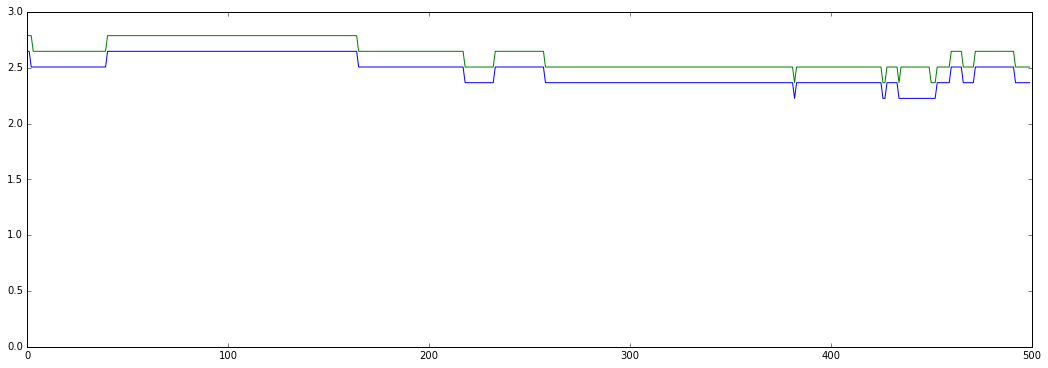

In [17]:
    plt.figure(figsize=(18,6))
    plt.plot(X[-24000][:, 0:2]+3)
    plt.plot(y[-24000][:, 0:2])

In [11]:
(X, y) = prepare_tradcom_classification(training = True, sequence_length = 5000, features = 4, output_dim = 3, filename='../models/training_data_large/prod_data_20130729v.txt')

Creating files  ../models/training_data_large/prod_data_20130729v_X.npy  and  ../models/training_data_large/prod_data_20130729v_y.npy
Working on Input files:  ../models/training_data_large/prod_data_20130729v.txt ,  ../models/training_data_large/signal_20130729v.csv
(53353, 2)
(53353, 4)
[]
(53353, 4)
                  2             4             3             5
count  53353.000000  53353.000000  53353.000000  53353.000000
mean      -0.073039      0.073039     -0.033151      0.033151
std        0.997606      0.997071      1.175600      0.784732
min       -2.179854     -2.039273     -0.856964     -0.856964
25%       -0.774042     -0.633461     -0.506445     -0.535655
50%       -0.071136      0.069445     -0.243556     -0.185137
75%        0.631770      0.772351      0.165382      0.428271
max        2.178163      2.318744     20.816764      6.620764
(48354, 5000, 4)
              2         4         3         5
0                                            
71997749  1.897  2.037581 -0.5

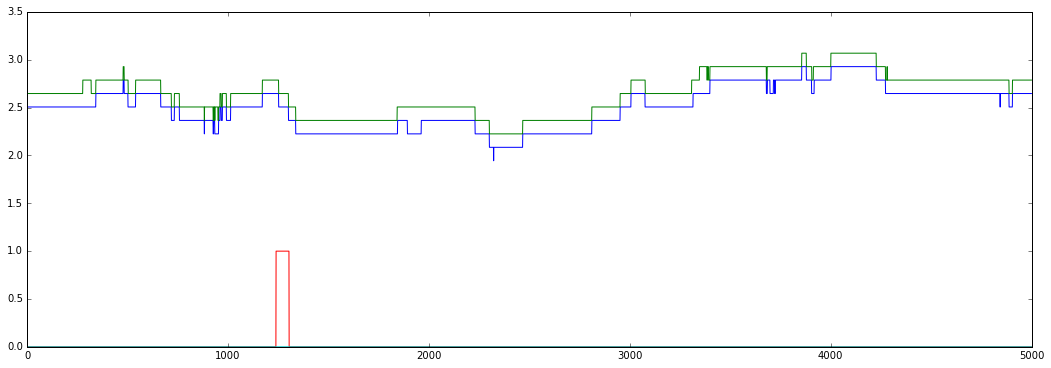

In [13]:
    plt.figure(figsize=(18,6))
    plt.plot(X[-20000][:, 0:2]+3)
    plt.plot(y[-20000][:, 0:2])

In [12]:
(X, y) = prepare_tradcom_classification(training = True, stack=False, sequence_length = 500, features = 4, output_dim = 3, filename='../models/training_data_large/prod_data_20130729v.txt')

Found files  ../models/training_data_large/prod_data_20130729v_X.npy  and  ../models/training_data_large/prod_data_20130729v_y.npy


In [29]:
X.shape

(53353, 4)

In [13]:
X = X.reshape((1, X.shape[0], X.shape[1]))

In [14]:
X.shape

(1, 53353, 4)

In [30]:
y.shape

(53353, 3)

In [15]:
y = y.reshape((1, y.shape[0], y.shape[1]))

In [16]:
y.shape

(1, 53353, 3)

In [10]:
model = ufcnn_model_concat(day_data_length=50000, regression = False, output_dim=3, features=4, 
       loss="categorical_crossentropy", sequence_length=500, optimizer=sgd )

In [11]:
print_nodes_shapes(model)

input : <class 'keras.layers.core.Layer'> : (None, None, 4) : (None, None, 4)
input_padding : <class 'keras.layers.convolutional.ZeroPadding1D'> : (None, None, 4) : (None, None, 4)
conv1 : <class 'keras.layers.convolutional.Convolution1D'> : (None, None, 4) : (None, None, 150)
relu1 : <class 'keras.layers.core.Activation'> : (None, None, 150) : (None, None, 150)
conv2 : <class 'keras.layers.convolutional.Convolution1D'> : (None, None, 150) : (None, None, 150)
relu2 : <class 'keras.layers.core.Activation'> : (None, None, 150) : (None, None, 150)
conv3 : <class 'keras.layers.convolutional.Convolution1D'> : (None, None, 150) : (None, None, 150)
relu3 : <class 'keras.layers.core.Activation'> : (None, None, 150) : (None, None, 150)
conv4 : <class 'keras.layers.convolutional.Convolution1D'> : (None, None, 150) : (None, None, 150)
relu4 : <class 'keras.layers.core.Activation'> : (None, None, 150) : (None, None, 150)
conv5 : <class 'keras.layers.convolutional.Convolution1D'> : (None, None, 300

In [17]:
history = model.fit({'input': X, 'output': y},
                      verbose=2,
                      nb_epoch=1,
                      shuffle=False,
                      batch_size=1)

Epoch 1/1
18s - loss: 1.0195


In [19]:
history.params

{'batch_size': 1,
 'do_validation': False,
 'metrics': ['loss', 'val_loss'],
 'nb_epoch': 1,
 'nb_sample': 1,
 'verbose': 2}

In [20]:
print_nodes_shapes(model)

input : <class 'keras.layers.core.Layer'> : (None, None, 4) : (None, None, 4)
input_padding : <class 'keras.layers.convolutional.ZeroPadding1D'> : (None, None, 4) : (None, None, 4)
conv1 : <class 'keras.layers.convolutional.Convolution1D'> : (None, None, 4) : (None, None, 150)
relu1 : <class 'keras.layers.core.Activation'> : (None, None, 150) : (None, None, 150)
conv2 : <class 'keras.layers.convolutional.Convolution1D'> : (None, None, 150) : (None, None, 150)
relu2 : <class 'keras.layers.core.Activation'> : (None, None, 150) : (None, None, 150)
conv3 : <class 'keras.layers.convolutional.Convolution1D'> : (None, None, 150) : (None, None, 150)
relu3 : <class 'keras.layers.core.Activation'> : (None, None, 150) : (None, None, 150)
conv4 : <class 'keras.layers.convolutional.Convolution1D'> : (None, None, 150) : (None, None, 150)
relu4 : <class 'keras.layers.core.Activation'> : (None, None, 150) : (None, None, 150)
conv5 : <class 'keras.layers.convolutional.Convolution1D'> : (None, None, 300

In [16]:
model = ufcnn_model_seq(regression = False, output_dim=3, features=4, 
       loss="categorical_crossentropy", sequence_length=500, optimizer=sgd )

In [17]:
print_layers_shapes(model)

<class 'keras.layers.convolutional.ZeroPadding1D'> : (None, None, 4) : (None, None, 4)
<class 'keras.layers.convolutional.Convolution1D'> : (None, None, 4) : (None, None, 150)
<class 'keras.layers.core.Activation'> : (None, None, 150) : (None, None, 150)
<class 'keras.layers.convolutional.Convolution1D'> : (None, None, 150) : (None, None, 3)
<class 'keras.layers.core.Activation'> : (None, None, 3) : (None, None, 3)


In [23]:
history = model.fit(X, y,
                      verbose=2,
                      nb_epoch=1,
                      batch_size=1
                    )

Epoch 1/1
14s - loss: 1.1141
